# **Implementing Decision Tree using Scikit Learn on PlayTennis dataset**

**About the dataset**  
This dataset contains some information on the the local weather such as outlook, temperature, humidity and windy along with a label if the condition permits you to play outdoor tennis.

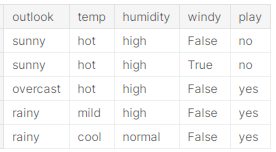

We will build a simple tree based model that can predict if the weather permits to play outdoor tennis. 

## Follow below steps to load your csv file into Kaggle environment.
1. Click 'Add data' on the right pane besides the 'Data' option.
2. Click 'Upload a dataset'
3. Enter Dataset title as 'playing-tennis' and drag and drop the 'PlayTennis.csv' file into the window  
4. Select 'Skip duplicates' and change to 'include duplicates' and confirm

## 1. First lets start with importing the needed python libraries

Basic packages like pandas, numpy, matplotlib, seaborn, scipy.stats (for Spearman correlation) and sklearn (scikit-learn) are imported here

In [ ]:
# TYPE your import steps here
# <Code begin>



# <Code end>

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/playing-tennis/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## 2. Load the csv file into a pandas DataFrame

In [ ]:
#Loading the PlayTennis data using read_csv()
# TYPE your code here. Check the file path from first step
# <Code begin>

PlayTennis =  # <read into this dataframe variable>

# <Code end>

## 3. Print the dataset that was just loaded to view if it was loaded as expected

In [ ]:
# TYPE your code here to view first few rows
# <Code begin>

 

# <Code end>

In [ ]:
# TYPE your code here to view last few rows
# <Code begin>

 

# <Code end>

## 4. Explore the shape, high level summary of the dataset.
  * How many observations and attributes are in the dataset
  * Are there any missing information?
  * What are the data types for each column?
  * Are there any duplicate records?
  * Are there any unwanted columns that needs to be removed / dropped?

In [ ]:
# TYPE your code here to view the shape
# <Code begin>

 

# <Code end>

#(Observations, attributes)

In [ ]:
# TYPE your code here to Print a concise summary of a DataFrame using info()
# <Code begin>

 

# <Code end>

In [ ]:
# TYPE your code here to look for duplicate records using duplicated()
# <Code begin>

 

# <Code end>

In [ ]:
# TYPE your code here to Generate descriptive statistics to see the #unique, #frequent values for each categorical column using .describe()
# <Code begin>


# <Code end>

## 5. Exploratory Data analysis

1. Does the dataset have more windy days?
2. Is there a imbalance in the class labels?
3. Do you see any correlation between any of the features to the target class (play)?

**Univariate analysis**  
Look at the frequency distribution of each attribute using value_counts()

In [ ]:
# TYPE your code here to view the frequency distribution of each column using value_counts().Hint: use for loop to go over each column
# Access columns of a dataframe using the command PlayTennis.columns where PlayTennis is the name of the dataframe
# <Code begin>


# <Code end>

**Visualize the frequency distribution using seaborn's countplot()**

In [ ]:
# TYPE your code here to view the frequency distribution in a graphical plot using countplot(). Similar steps as previous cell.
# <Code begin>


# <Code end>

**Type your Observation here:**






**Bivariate Analysis**  
Lets look at the correlation between class variable with other features using seaborn's countplot()

In [ ]:
#Analysis on categorical data
# TYPE your code here to view the frequency distribution for each class label 'play' in a graphical plot using countplot(). 
# Hint: Similar steps as previous cell. Use hue as 'play' and Use appropriate title for the plots
# <Code begin>


# <Code end>

**Type your Observation here:**






#### Spearman correlation: Calculate strong relationship between 2 categorical variables using statistical approach
* What are your observations in correlation?

In [ ]:
#Encoding ordinal categorical values using simple replace. This will preserve the order of values as compared to other encoding techniques.

catg_to_nums = {"outlook": {'rainy':0 ,'overcast':1,'sunny':2},
                "temp": {'cool':0,'mild':1,'hot':2},
                "humidity": {'normal': 0,'high': 1},
                "windy": {False: 0,True: 1},
                "play": {'no': 0, 'yes': 1}}

PlayTennis_obj = PlayTennis.replace(catg_to_nums)

In [ ]:
df_spearmanr = pd.DataFrame(stats.spearmanr(PlayTennis_obj)[0], index = PlayTennis_obj.columns, columns = PlayTennis_obj.columns)

plt.figure(figsize=(7,7))
ax= sns.heatmap(df_spearmanr, vmax=.8, square = True, fmt = '.2f', annot = True, 
                linecolor = 'white', linewidths = 0.01)
plt.title('Cross correlation between categorical values')

- 0.8 to 1 -> very high positive correlation    
- 0.5 to 0.8 -> moderate positive correlation  
- .> 0 to 0.5 -> weak positive correlation  
- 0 - no correlation  
- -0.5 to < 0 -> weak negative correlation  
- -0.8 to -0.5 -> moderate negative correlation  
- -1 to -0.8 -> very high negative correlation  

**Type your Observation here:**






In [ ]:
PlayTennis_obj.head()

## 6. Declare feature vector and target variable

Lets split the data and its coresponding prediction values.
* X - holds the training data.
* y - holds all the decisions.

In [ ]:
# TYPE your code here to assign the X and y variables. Dont convert them to numpy arrays in this step
# <Code begin>


# <Code end>

## 7. Split data into train and test set

To build and evaluate a model, we need to create a Train and test set.  
Split of dataset into Train:Test ratio as 70:30 with random seed as 23 using sklearn.model_selection.train_test_split()

In [ ]:
from sklearn.model_selection import train_test_split

# TYPE your code here to split the dataset into X_train, X_test, y_train, y_test
# <Code begin>

X_train, X_test, y_train, y_test = 

# <Code end>

In [ ]:
# TYPE your code here to check the shape of X_train and X_test
# <Code begin>


# <Code end>
# Is it ((9, 4), (5, 4)) ?

## 8. Decision Tree modeling

Build a Decision Tree model with below hyper parameters
   - criterion = gini
   - random seed = 42
   - max tree depth = 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# TYPE your code here to instantiate the DecisionTreeClassifier model with criterion gini index and fit on X_train and y_train
# <Code begin>

# instantiate the DecisionTreeClassifier model with criterion gini index
clf =

# fit the model

# <Code end>

**Predict on test set**

In [ ]:
# TYPE your code here to predict on X_test
# <Code begin>

y_pred = 

# <Code end>

**Check accuracy score on test set**

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

**Is the model over-fitting? Try to remove the max_depth and evaluate the model performance. Is it overfitting now?**

**Visualize the tree**

In [ ]:
# We can visualize the tree using tree.plot_tree
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf)

[GraphViz](https://www.graphviz.org/) gives a better and clearer Graph.

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=['no','yes'], 
                              filled=True, rounded=True)

graph = graphviz.Source(dot_data) 
graph.render("gini")
graph 

Are you able to follow through the tree logic to understand how the model learned from the training data?

## 9. Evaluate the model - Confusion Matrix and Classification report

In [ ]:
from sklearn.metrics import confusion_matrix


# TYPE your code here to build confusion matrix between the actual and predicted target class
# <Code begin>

confusion_matrix = 

# <Code end>


fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=np.unique(y_pred), 
            yticklabels=np.unique(y_test), linewidths = 0.7, linecolor = 'black', 
            cmap = 'YlGnBu')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# TYPE your code here to print classification_report between the actual and predicted target class
# <Code begin>


# <Code end>

**macro avg**  - Compute for each label, and returns the average without considering the proportion for each label in the dataset.  
**weighted avg** - Compute for each label, and returns the average considering the proportion for each label in the dataset.

## 10. Analyze the incorrect predictions

In [ ]:
#Decoding the ordinal categorical values using simple replace.
nums_to_catg = {"outlook": {0:'rainy' ,1: 'overcast', 2: 'sunny'},
                "temp": {0: 'cool',1:'mild',2:'hot'},
                "humidity": {0:'normal',1:'high'},
                "windy": {0:False,1:True},
                "play": {0:'no', 1:'yes'},
                "play_pred": {0:'no', 1:'yes'}}

In [ ]:
#This step shows the Actual and predicted class for all test observations
PlayTennis_test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), pd.DataFrame(y_pred, columns=['play_pred'])], axis = 1)
PlayTennis_test = PlayTennis_test.replace(nums_to_catg)
PlayTennis_test

**View of what the model learnt**

In [ ]:
#This step shows all training observations. You will see the train and test observations were different and 
# the model was able to learn based on the patterns it saw

PlayTennis_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis = 1)
PlayTennis_train = PlayTennis_train.replace(nums_to_catg)
PlayTennis_train